# Non uniform random numbers

In [2]:
#23.04.2024
#hbarsquared

import numpy as np

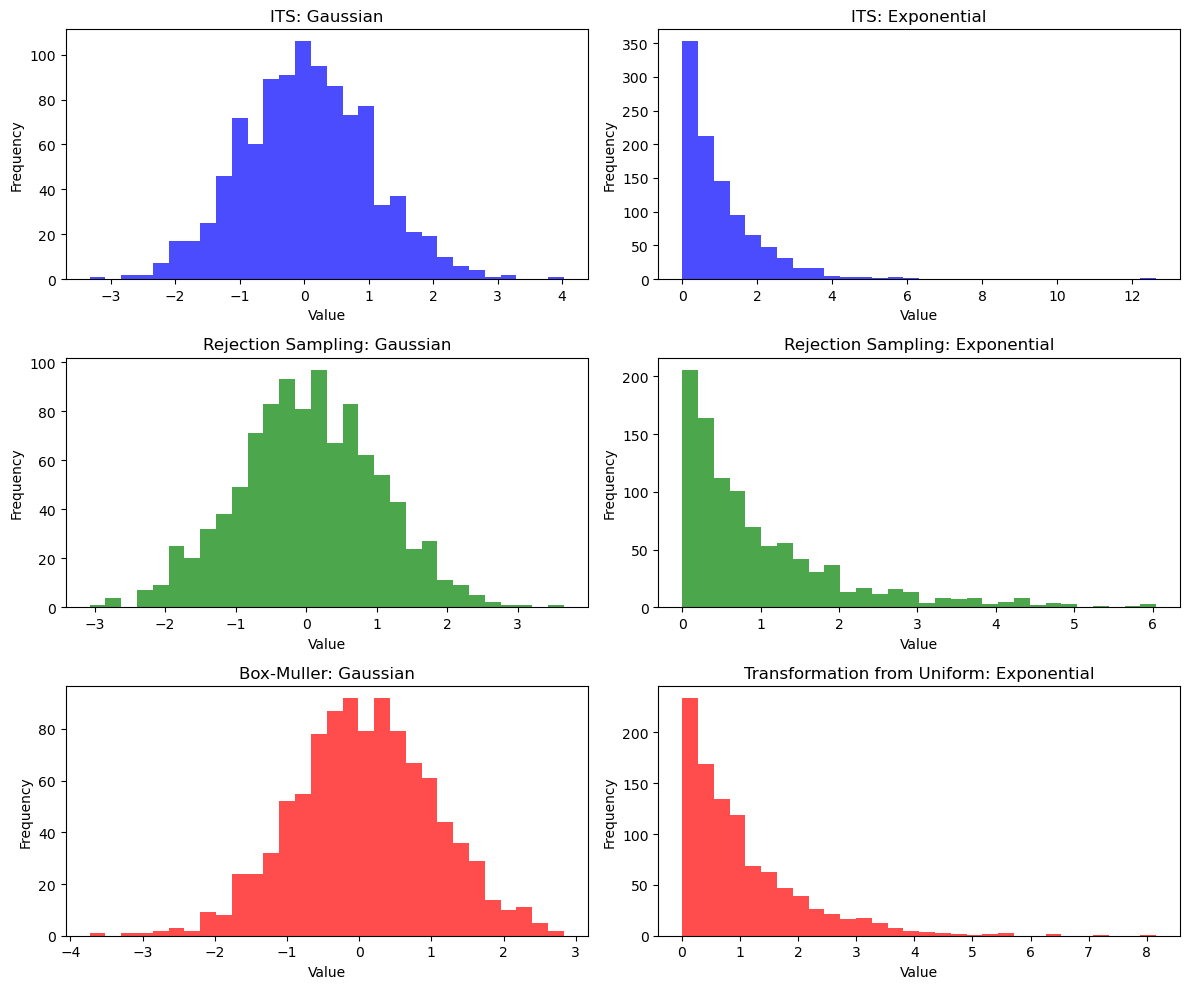

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Number of samples to generate
n_samples = 1000

# Implementing the Inverse Transform Sampling
def inverse_transform_sampling(n_samples, distribution):
    # Generate uniform random samples
    uniform_samples = np.random.uniform(0, 1, n_samples)
    # Compute the inverse CDF (PPF: Percent Point Function)
    return distribution.ppf(uniform_samples)

# Implementing Rejection Sampling
def rejection_sampling(n_samples, target_pdf, proposal_pdf, proposal_sampler, c):
    samples = []
    while len(samples) < n_samples:
        # Generate sample from proposal distribution
        x = proposal_sampler()
        # Generate uniform sample for comparison
        u = np.random.uniform(0, 1)
        # Rejection sampling condition
        if u < target_pdf(x) / (c * proposal_pdf(x)):
            samples.append(x)
    return np.array(samples)

# Implementing Transformation of Random Variables (Box-Muller)
def box_muller_transform(n_samples):
    u1 = np.random.uniform(0, 1, n_samples)
    u2 = np.random.uniform(0, 1, n_samples)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z0, z1

# Example usage:

# Setup for Gaussian and exponential distributions
target_gaussian = stats.norm()  # Standard normal distribution for Gaussian
target_exponential = stats.expon()  # Exponential distribution with lambda = 1

# Number of samples
n_samples = 1000

# Gaussian - Inverse Transform Sampling
its_gaussian_samples = inverse_transform_sampling(n_samples, target_gaussian)

# Exponential - Inverse Transform Sampling
its_exponential_samples = inverse_transform_sampling(n_samples, target_exponential)

# Rejection Sampling setup for Gaussian
# Using a normal distribution with a larger std as proposal; very inefficient but illustrative.
proposal_gaussian = stats.norm(scale=2)  # Wider Gaussian
c_gaussian = 2  # Not an optimal c, for illustrative purposes
rs_gaussian_samples = rejection_sampling(n_samples, target_gaussian.pdf, proposal_gaussian.pdf, proposal_gaussian.rvs, c_gaussian)

# Rejection Sampling setup for Exponential
# Using the same exponential with a scaling constant ensuring the envelope
c_exponential = 2  # scaling constant to ensure g(x) >= f(x)
rs_exponential_samples = rejection_sampling(n_samples, target_exponential.pdf, proposal_dist.pdf, proposal_dist.rvs, c_exponential)

# Box-Muller Transform for Gaussian
bm_gaussian_samples = box_muller_transform(n_samples)[0]  # Using only the first set Z0

# Transformation method for Exponential (Exponential distribution via transformation of a uniform)
exponential_from_uniform = -np.log(np.random.uniform(0, 1, n_samples))  # Transforming uniform to exponential

# Plotting the results
plt.figure(figsize=(12, 10))

# Histograms of Gaussian distributions from three methods
plt.subplot(3, 2, 1)
plt.hist(its_gaussian_samples, bins=30, alpha=0.7, color='blue')
plt.title("ITS: Gaussian")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 3)
plt.hist(rs_gaussian_samples, bins=30, alpha=0.7, color='green')
plt.title("Rejection Sampling: Gaussian")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 5)
plt.hist(bm_gaussian_samples, bins=30, alpha=0.7, color='red')
plt.title("Box-Muller: Gaussian")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Histograms of Exponential distributions from three methods
plt.subplot(3, 2, 2)
plt.hist(its_exponential_samples, bins=30, alpha=0.7, color='blue')
plt.title("ITS: Exponential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 4)
plt.hist(rs_exponential_samples, bins=30, alpha=0.7, color='green')
plt.title("Rejection Sampling: Exponential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(3, 2, 6)
plt.hist(exponential_from_uniform, bins=30, alpha=0.7, color='red')
plt.title("Transformation from Uniform: Exponential")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
